In [6]:
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10,10)
import numpy as np
import math

In [2]:
# Load in data
filename = r'C:\Users\Syris Norelli\Documents\HYG_Data\hygdata_v3.csv'
with open(filename, newline = '') as csvfile:
    iterator = csv.reader(csvfile, delimiter=',', quotechar='|')
    full_arr = [row for row in iterator][1:] # The first thing is just the "how to read"

In [4]:
# Print data info
print('Number of stars: ' + str(len(full_arr)))
print('Number of data points per star: ' + str(len(full_arr[0])))
print('Interesting indexes per star:')
print('0: ID in master database. We use this to collaborate with #team-stars.')
print('6: Proper name of star (if any)')
print('7: Right ascension')
print('8: Declination')
print('9: Distance in parsecs')
print('13: Magnitude (Earth-frame). 6.5 is the naked eye limit.')
print('14: Absolute magnitude (standard distance of 40 parsecs from star in question)')
print('15: Star spectrum')
print('17, 18, and 19: x,y,z variables of star')
print('29: Constellation address')

Number of stars: 119614
Number of data points per star: 37
Interesting indexes per star:
0: ID in master database. We use this to collaborate with #team-stars.
6: Proper name of star (if any)
7: Right ascension
8: Declination
9: Distance in parsecs
13: Magnitude (Earth-frame). 6.5 is the naked eye limit.
14: Absolute magnitude (standard distance of 40 parsecs from star in question)
15: Star spectrum
17, 18, and 19: x,y,z variables of star
29: Constellation address


In [3]:
# Useful names for later
proper_stars = [x for x in full_arr if x[6] != ''] # All named stars (146 stars)
naked_eye = [x for x in full_arr if float(x[13]) <= 6.5] # All naked-eye visible stars (8913 stars)
# (Full_arr has 119614 stars.)

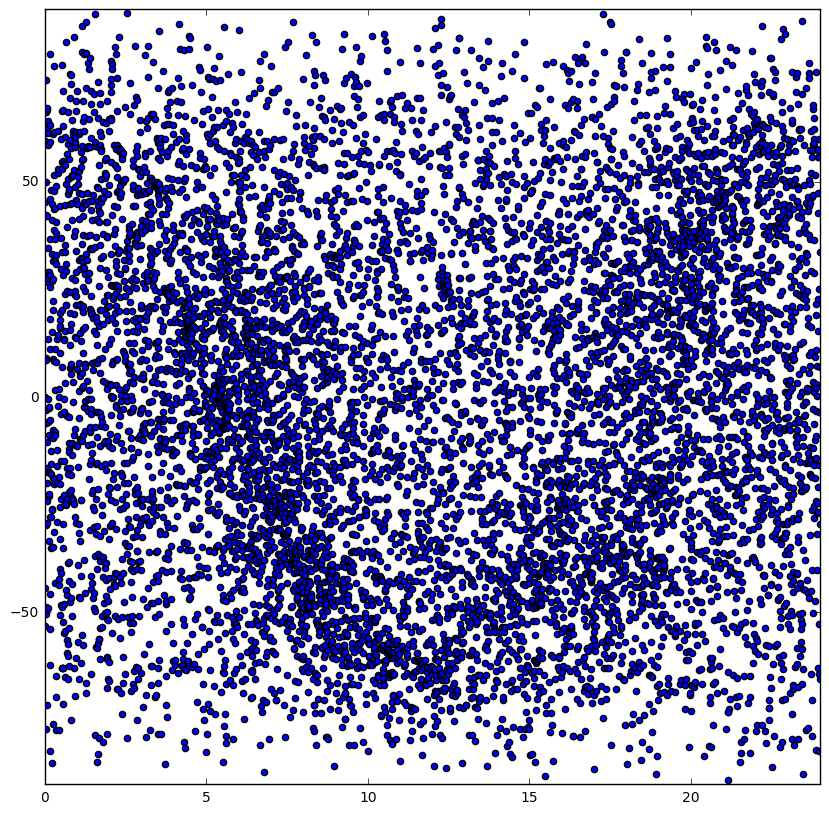

In [7]:
# Plotting where x/y is directly equal to phi/theta
to_plot = naked_eye

setting = 'full_sky' # Subset or full_sky

plt.clf()
plt.scatter([float(x[7]) for x in to_plot],[float(x[8]) for x in to_plot])
if setting == 'full_sky':
    plt.axis([0,24,-90,90])
if setting == 'subset':
    plt.axis([5,10,-50,0])
plt.show()

# The below isn't any sort of projection; it's simply mapping out the spherical coordinates in cartesian coordinates.
# This is why using techniques to quantify distortion won't work on this particular mapping.

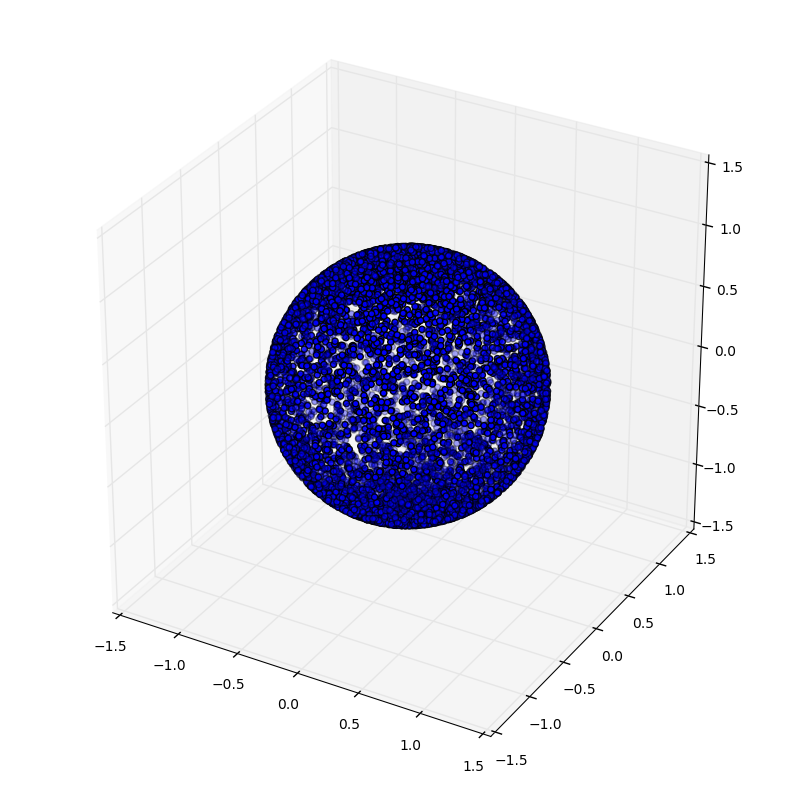

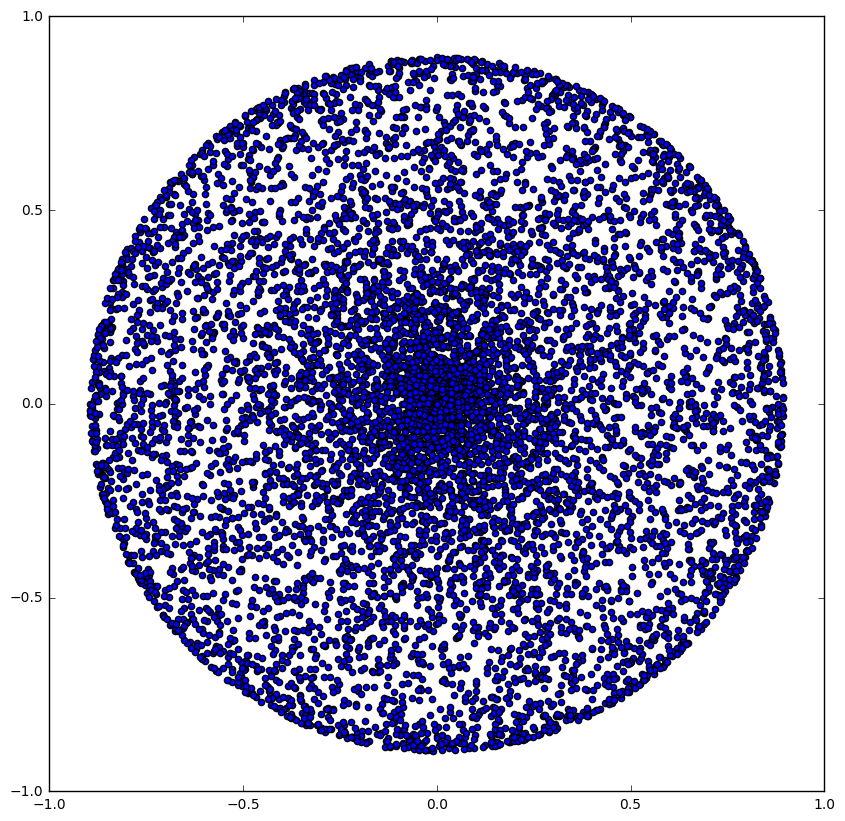

In [8]:
# Stereographic Projection from Scratch
plt.clf()
spherical_data = [[float(x[7])*15,float(x[8]),x[6]] for x in naked_eye]
spherized = [[math.cos(x[0])*math.cos(x[1]),math.sin(x[0])*math.cos(x[1]),math.sin(x[1]),x[2]] for x in spherical_data]
# Sanity check for data; all these points should be ~1
# print('Highest x: ' + str(max([x[0] for x in stereographed])))
# print('Highest y: ' + str(max([x[1] for x in stereographed])))
# print('Highest z: ' + str(max([x[2] for x in stereographed])))
spfig = plt.figure()
ax = spfig.add_subplot(111,projection='3d')
ax.scatter([x[0] for x in spherized],[x[1] for x in spherized],[x[2] for x in spherized])
plt.show()
# Not sure where runtime error is coming from
# Now for the stereographic bit
plt.clf()
margin = 0.5 # If it's 0, the stereograph gets weird results (because of z being near 1 in many places).
stereographed = [[x[0]/(1-x[2]+margin),x[1]/(1-x[2]+margin)] for x in spherized]
plt.scatter([x[0] for x in stereographed],[x[1] for x in stereographed])
# plt.axis([-1000,1000,-2000,2000])
plt.show()

[-37.7749, 8.161293333333333]
debug2
debug3
[-90, -79.7251] [23.161293333333333, 24]
<generator object <genexpr> at 0x00000297B7D39780>


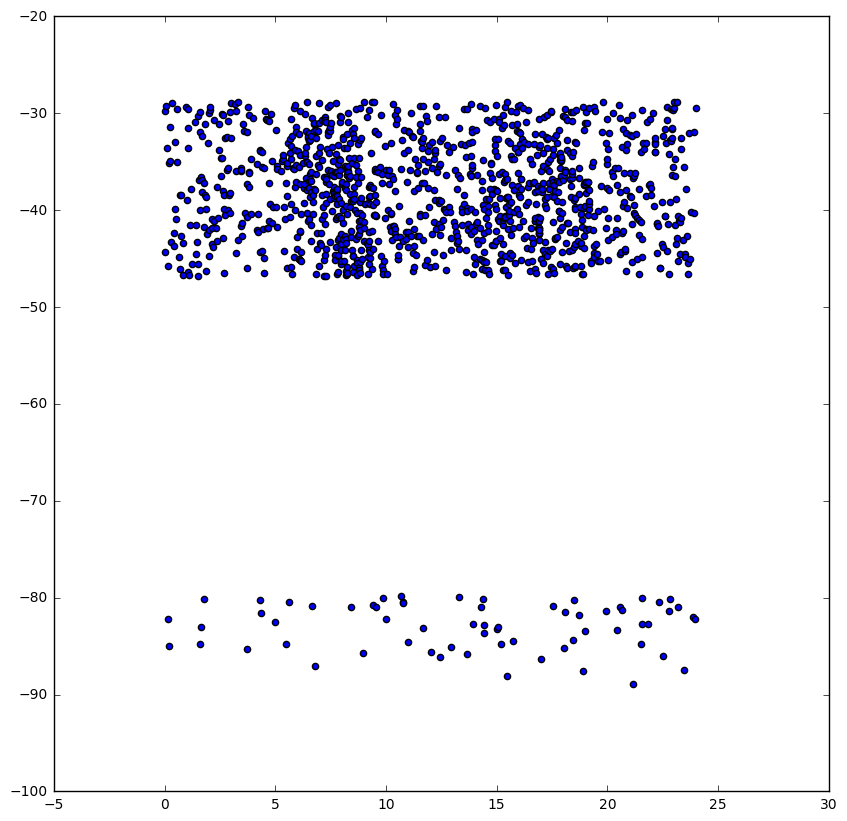

In [9]:
def latlong_bound(stargroup, latlong):
    # lat then long
    # I'm just going to assume the measuring from coordinates are the same
    # Jesus christ this problem is difficult
    latlong[1] = latlong[1]/15
    if latlong[1] < 0: # Weird coordinate switching
        latlong[1] = 24 - abs(latlong[1])
    latrange = 9
    longrange = 62.5
    latextra = [0,0]
    longextra = [0,0]
    # Dealing with extra lat
    print(latlong)
    if latlong[0] >= 90 - longrange:
        print('debug1')
        extra = longrange-(90-latlong[0]) # how much spillover there is into the 90+ range
        latextra = [90-extra,90]
    elif latlong[0] <= -90 + longrange:
        print('debug2')
        extra = longrange-abs(-90-latlong[0])
        latextra = [-90,-90+extra]
    # Dealing with extra long
    if latlong[1] <= latrange:
        print('debug3')
        extra = latrange-latlong[1]
        longextra = [24-extra, 24]
    elif latlong[1] >= 24-latrange:
        print('debug4')
        extra = latrange-(24-latlong[1]) # how much spillover there is into the 24+ range
        longextra = [0, extra]
    print(latextra, longextra)
    bounded = [x for x in stargroup if ((latlong[0] - latrange <= float(x[8]) <= latlong[0] + latrange) or (latextra[0] <= float(x[8]) <= latextra[1])) and ((latlong[1] - longrange <= float(x[7]) <= latlong[1] + longrange) or (longextra[0] <= float(x[7]) <= longextra[1]))]
    # print(bounded)
    return bounded

# West is minus, South is minus
to_plot = latlong_bound(naked_eye,[-37.7749,122.4194])
print([x[7],x[8]] for x in to_plot)
plt.scatter([float(x[7]) for x in to_plot],[float(x[8]) for x in to_plot])
plt.show()